Analytics on Film Dataset by **Rafi Adyatma**

---

Dataset is from Kaggle. Click [here](https://www.kaggle.com/datasets/alessandrolobello/the-ultimate-film-statistics-dataset-for-ml) to view the original source.

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Read dataset
film = pd.read_csv("./sample_data/movie_statistic_dataset.csv")

In [16]:
# The first 5 rows of film
film.head()

,movie_title,production_date,genres,runtime_minutes,director_name,director_professions,director_birthYear,director_deathYear,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $
0,Avatar: The Way of Water,2022-12-09,"Action,Adventure,Fantasy",192.0,James Cameron,"writer,producer,director",1954,alive,7.8,277543.0,7.061101,460000000,667830256,2265935552
1,Avengers: Endgame,2019-04-23,"Action,Adventure,Drama",181.0,-,-,-,-,8.4,1143642.0,8.489533,400000000,858373000,2794731755
2,Pirates of the Caribbean: On Stranger Tides,2011-05-20,"Action,Adventure,Fantasy",137.0,Rob Marshall,"director,miscellaneous,producer",1960,alive,6.6,533763.0,6.272064,379000000,241071802,1045713802
3,Avengers: Age of Ultron,2015-04-22,"Action,Adventure,Sci-Fi",141.0,Joss Whedon,"writer,producer,director",1964,alive,7.3,870573.0,7.214013,365000000,459005868,1395316979
4,Avengers: Infinity War,2018-04-25,"Action,Adventure,Sci-Fi",149.0,-,-,-,-,8.4,1091968.0,8.460958,300000000,678815482,2048359754


Data is shown as above. There are some potential information we can gain from this data. We may start from my questions below:

1.   What is the most popular film genre?
2.   What are the favorite genres of each top 5 directors who generates the most worldwide gross?
3.   What is the average worldwide gross for each genre?
4.   Is there any connection between rating (in *approval_index*), production budget, and worldwide gross?





In [17]:
# Checking any missing values
film.isnull().sum(axis=0)

movie_title             0
production_date         0
genres                  0
runtime_minutes         0
director_name           0
director_professions    0
director_birthYear      0
director_deathYear      0
movie_averageRating     0
movie_numerOfVotes      0
approval_Index          0
Production budget $     0
Domestic gross $        0
Worldwide gross $       0
dtype: int64

From above result, we can see that there is no missing
values.

# #1 Most popular film genre

In [73]:
# Get all genres as dictionary. Key is genre, value is total movie counts
# Build this process as a function

def countByGenres(df):
  genres = {}
  genre_col = df['genres']

  for idx in range(len(genre_col)):
    curr_genre = genre_col[idx]
    split_genre = curr_genre.split(",")
    for genre in split_genre:
      if genre in genres:
        genres[genre] += 1
      else:
        genres[genre] = 1

  return genres

genres = countByGenres(film)
genres

{'Action': 1211,
 'Adventure': 968,
 'Fantasy': 350,
 'Drama': 2210,
 'Sci-Fi': 379,
 'Thriller': 668,
 'Animation': 241,
 'Comedy': 1656,
 'Family': 265,
 'Crime': 780,
 'Mystery': 409,
 'Western': 44,
 'Romance': 724,
 'Musical': 56,
 'Horror': 456,
 'History': 149,
 'Biography': 338,
 'Documentary': 67,
 'War': 86,
 'Sport': 114,
 'Music': 145,
 '\\N': 2,
 'Film-Noir': 7,
 'News': 1}

In [74]:
# We need to remove noise data from genres
genres.pop("\\N")
genres

{'Action': 1211,
 'Adventure': 968,
 'Fantasy': 350,
 'Drama': 2210,
 'Sci-Fi': 379,
 'Thriller': 668,
 'Animation': 241,
 'Comedy': 1656,
 'Family': 265,
 'Crime': 780,
 'Mystery': 409,
 'Western': 44,
 'Romance': 724,
 'Musical': 56,
 'Horror': 456,
 'History': 149,
 'Biography': 338,
 'Documentary': 67,
 'War': 86,
 'Sport': 114,
 'Music': 145,
 'Film-Noir': 7,
 'News': 1}

In [41]:
# Make another dataframe and plot the genre
most_popular = pd.DataFrame.from_dict(genres, orient='index', columns=["Movie Counts"])
sorted_most_popular = most_popular.sort_values(by="Movie Counts", ascending=False)

sorted_most_popular.head()

,Movie Counts
Drama,2210
Comedy,1656
Action,1211
Adventure,968
Crime,780


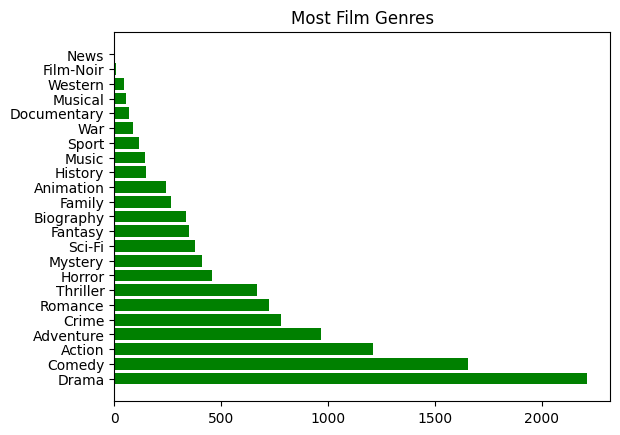

In [126]:
# Plot the graph as vertical bar chart
plt.barh(sorted_most_popular.index, sorted_most_popular['Movie Counts'], color='green')
plt.title("Most Film Genres")
plt.show()

To conclude our question, we can directly observe the graph above. We can conclude that top 5 genres are:

1. Drama
2. Comedy
3. Action
4. Adventure
5. Crime

# #2 Favorite genres of each top 5 directors who generates the most worldwide gross

In [54]:
# Check missing values
film['director_name'].isnull().sum()

0

In [61]:
# Get top 5 directors by most worldwide gross
directors_by_worldgross = film.groupby(['director_name'])['Worldwide gross $'].sum()
directors_by_worldgross

director_name
-                       66116079762
Aaron Woodley              11285154
Abderrahmane Sissako        6815821
Abel Ferrara                1412799
Adam Brooks                55617866
                           ...     
Zack Snyder              2716244049
Zak Penn                      56073
Zal Batmanglij              3027956
Zara Hayes                 17901314
Émile Gaudreault           12399772
Name: Worldwide gross $, Length: 1835, dtype: int64

In [62]:
# There is actually noise data with director_name equals to "-". Let's remove it
directors_by_worldgross = directors_by_worldgross.loc[directors_by_worldgross.index != "-"]
directors_by_worldgross

director_name
Aaron Woodley             11285154
Abderrahmane Sissako       6815821
Abel Ferrara               1412799
Adam Brooks               55617866
Adam Marcus               15935068
                           ...    
Zack Snyder             2716244049
Zak Penn                     56073
Zal Batmanglij             3027956
Zara Hayes                17901314
Émile Gaudreault          12399772
Name: Worldwide gross $, Length: 1834, dtype: int64

In [66]:
# Top 5 directors
sorted_directors_by_worldgross = directors_by_worldgross.sort_values(ascending=False)
top_5_directors = sorted_directors_by_worldgross.iloc[:5,]
top_5_directors

director_name
Steven Spielberg     9227775652
James Cameron        8608634904
Peter Jackson        6496046429
Michael Bay          6374256745
Christopher Nolan    4920972587
Name: Worldwide gross $, dtype: int64

In [77]:
# Show films data only for top 5 directors
top_director_films = film[film['director_name'].isin(top_5_directors.index)]
top_director_films

,movie_title,production_date,genres,runtime_minutes,director_name,director_professions,director_birthYear,director_deathYear,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $
0,Avatar: The Way of Water,2022-12-09,"Action,Adventure,Fantasy",192.0,James Cameron,"writer,producer,director",1954,alive,7.8,277543.0,7.061101,460000000,667830256,2265935552
16,The Hobbit: The Desolation of Smaug,2013-12-12,Fantasy,161.0,Peter Jackson,"producer,director,writer",1961,alive,7.8,670151.0,7.566997,250000000,258241522,959358436
17,The Hobbit: The Battle of the Five Armies,2014-12-10,"Adventure,Fantasy",144.0,Peter Jackson,"producer,director,writer",1961,alive,7.4,539316.0,7.053929,250000000,255119788,940323039
20,Avatar,2009-12-17,"Action,Adventure,Fantasy",162.0,James Cameron,"writer,producer,director",1954,alive,7.9,1316701.0,8.058261,237000000,785221649,2923706026
22,The Dark Knight Rises,2012-07-19,"Action,Drama",164.0,Christopher Nolan,"writer,producer,director",1970,alive,8.4,1715219.0,8.740035,230000000,448139099,1082228107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2725,The Color Purple,1985-12-18,Drama,154.0,Steven Spielberg,"producer,writer,director",1946,alive,7.7,88614.0,6.322087,15000000,94029472,94029472
2983,Jaws,1975-06-20,"Adventure,Thriller",124.0,Steven Spielberg,"producer,writer,director",1946,alive,8.1,612566.0,7.809561,12000000,272257035,482947378
3130,E.T. the Extra-Terrestrial,1982-06-11,"Adventure,Family,Sci-Fi",115.0,Steven Spielberg,"producer,writer,director",1946,alive,7.9,414888.0,7.386997,10500000,439251124,797103542
3543,The Terminator,1984-10-26,"Action,Sci-Fi",107.0,James Cameron,"writer,producer,director",1954,alive,8.1,872018.0,8.020026,6400000,38019031,78019031


In [93]:
# We will use dictionary to get this request. The directors' name would be the key, the values are another dictionary with genre be the key and value is the count.
top_genres = {}

# Set the outer dictionary
for dir in top_5_directors.index:
  top_genres[dir] = {}

# Inner dictionary, genre counts for each directors
for idx in top_director_films.index:
  merged_genre = top_director_films['genres'][idx]
  dir_name = top_director_films['director_name'][idx]
  split_genres = merged_genre.split(",")
  for genre in split_genres:
    if genre in top_genres[dir_name]:
      top_genres[dir_name][genre] += 1
    else:
      top_genres[dir_name][genre] = 1

top_genres

{'Steven Spielberg': {'Action': 12,
  'Adventure': 13,
  'Sci-Fi': 6,
  'Family': 3,
  'Fantasy': 1,
  'Animation': 1,
  'Crime': 2,
  'Mystery': 1,
  'Drama': 11,
  'Musical': 1,
  'Comedy': 3,
  'Romance': 1,
  'History': 5,
  'War': 2,
  'Biography': 3,
  'Thriller': 2},
 'James Cameron': {'Action': 6,
  'Adventure': 4,
  'Fantasy': 2,
  'Drama': 2,
  'Romance': 1,
  'Sci-Fi': 3,
  'Comedy': 1,
  'Thriller': 1,
  'Mystery': 1},
 'Peter Jackson': {'Fantasy': 4,
  'Adventure': 5,
  'Action': 4,
  'Drama': 6,
  'Thriller': 1,
  'Biography': 1,
  'Crime': 1},
 'Michael Bay': {'Action': 12,
  'Adventure': 7,
  'Sci-Fi': 7,
  'Drama': 1,
  'History': 1,
  'Comedy': 3,
  'Crime': 3,
  'Thriller': 2},
 'Christopher Nolan': {'Action': 6,
  'Drama': 7,
  'Sci-Fi': 4,
  'Thriller': 2,
  'Crime': 2,
  'Adventure': 2,
  'History': 1,
  'Mystery': 2}}

In [97]:
# Convert dictionary to DataFrame
df_problem_2 = pd.DataFrame.from_dict(top_genres)
df_problem_2

,Steven Spielberg,James Cameron,Peter Jackson,Michael Bay,Christopher Nolan
Action,12,6.0,4.0,12.0,6.0
Adventure,13,4.0,5.0,7.0,2.0
Sci-Fi,6,3.0,NaN,7.0,4.0
Family,3,NaN,NaN,NaN,NaN
Fantasy,1,2.0,4.0,NaN,NaN
Animation,1,NaN,NaN,NaN,NaN
Crime,2,NaN,1.0,3.0,2.0
Mystery,1,1.0,NaN,NaN,2.0
Drama,11,2.0,6.0,1.0,7.0
Musical,1,NaN,NaN,NaN,NaN


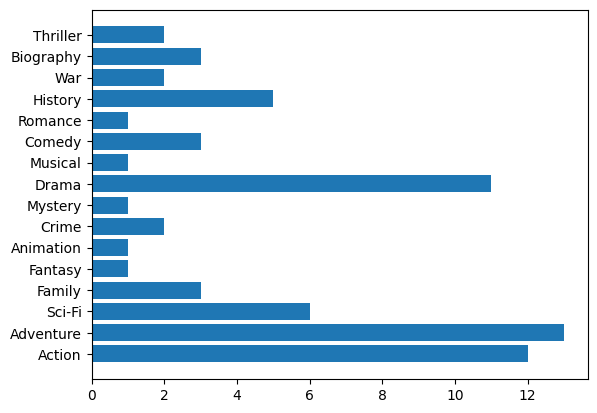

In [101]:
# Director 1: Steven Spielberg
dir1 = df_problem_2['Steven Spielberg']

plt.barh(dir1.index, dir1)
plt.show()

From the graph above, we can say that **Steven Spielberg** directed **Adventure, Action, or Drama** films the most but **not** necessarily the combination of those three.

Another point we can make is that Spielberg directed every genre of films.

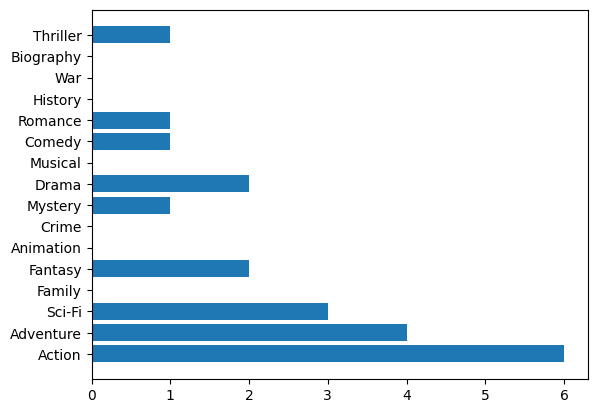

In [102]:
# Director 2: James Cameron
dir2 = df_problem_2['James Cameron']

plt.barh(dir2.index, dir2)
plt.show()

Graph above points out that **James Cameron** directed **Action, Adventure, or Sci-Fi** films the most but **not** necessarily the combination of those 3.

Cameron also has not directed any of films with genre of Animation, Crime, Musical, History, and War.

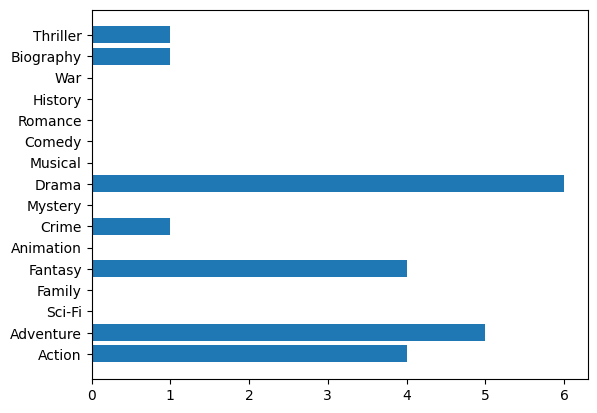

In [103]:
# Director 3: Peter Jackson
dir3 = df_problem_2['Peter Jackson']

plt.barh(dir3.index, dir3)
plt.show()

**Peter Jackson** focused his directing career on films with genre of **Drama, Adventure, Action, or Fantasy**.

Also, Jackson has not directed film with genre of Sci-Fi, Family, Animation, Mystery, Musical, Comedy, Romance, History, and War.

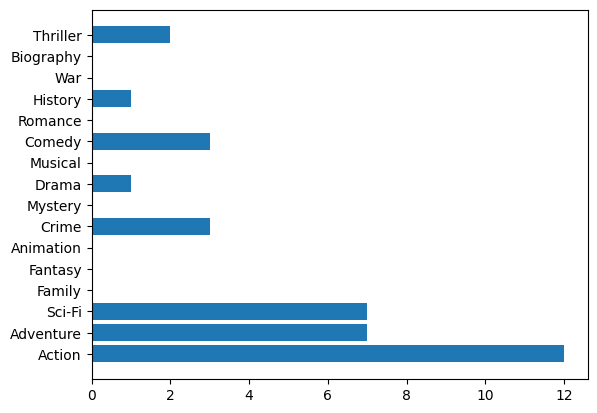

In [104]:
# Director 4: Michael Bay
dir4 = df_problem_2['Michael Bay']

plt.barh(dir4.index, dir4)
plt.show()

Meanwhile, **Michael Bay** focused on film with genre of **Action, Adventure, or Sci-Fi**.

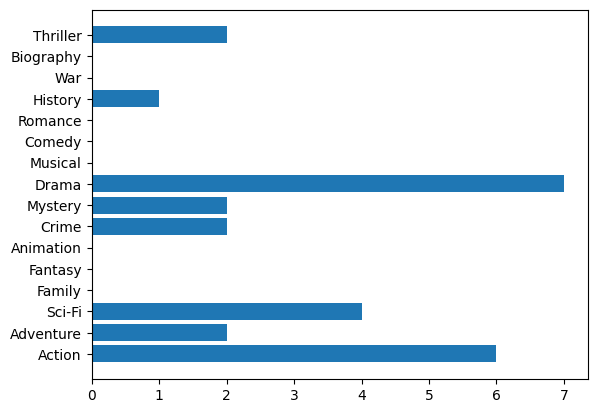

In [106]:
# Director 5: Christopher Nolan
dir5 = df_problem_2['Christopher Nolan']

plt.barh(dir5.index, dir5)
plt.show()

For the 5th director, **Christopher Nolan**, mainly directed **Drama, Action, or Sci-Fi** films.

All top directors except Spielberg, have not directed film with genre of **Family, Animation, Musical, and War**.

# #3 What is the average worldwide gross for each genre?

In [108]:
# Checking missing values
film['Worldwide gross $'].isna().sum()

0

In [112]:
# Split every genre and do sum on worldwide gross (in million $) for each genre
genre_gross = {}

for idx in film.index:
  merged_genres = film['genres'][idx]
  gross = film['Worldwide gross $'][idx] # In $
  mill_gross = gross / 1000000 # In Million $

  split_genres = merged_genres.split(",")
  for genre in split_genres:
    if genre in genre_gross:
      value = genre_gross[genre]
      updated_gross = value[0] + mill_gross
      updated_count = value[1] + 1
      updated_value = (updated_gross, updated_count)

      # Update the new value
      genre_gross[genre] = updated_value
    else:
      genre_gross[genre] = (mill_gross, 1)


genre_gross

{'Action': (230670.9326800004, 1211),
 'Adventure': (245567.19931999999, 968),
 'Fantasy': (62831.538683000035, 350),
 'Drama': (162308.41928799966, 2210),
 'Sci-Fi': (85006.50932499996, 379),
 'Thriller': (71708.42330000011, 668),
 'Animation': (73428.37523600005, 241),
 'Comedy': (171444.13599299983, 1656),
 'Family': (38870.70609500001, 265),
 'Crime': (60068.017038, 780),
 'Mystery': (35040.516805, 409),
 'Western': (2477.294418999999, 44),
 'Romance': (49676.85791500001, 724),
 'Musical': (4635.227205000001, 56),
 'Horror': (32131.733519999976, 456),
 'History': (8994.956562000008, 149),
 'Biography': (21275.934157999985, 338),
 'Documentary': (1879.8418009999996, 67),
 'War': (5328.855292000002, 86),
 'Sport': (5793.689315999997, 114),
 'Music': (8010.333907999995, 145),
 '\\N': (116.304148, 2),
 'Film-Noir': (60.016884000000005, 7),
 'News': (53.365925, 1)}

In [113]:
# Drop the noise data (\\N)
genre_gross.pop("\\N")

(116.304148, 2)

In [114]:
# Update the dictionary to become the average gross in millions

for genre in genre_gross:
  total_gross = genre_gross[genre][0]
  total_count = genre_gross[genre][1]
  avg = total_gross/total_count

  # Update value
  genre_gross[genre] = avg


genre_gross

{'Action': 190.47971319570635,
 'Adventure': 253.6851232644628,
 'Fantasy': 179.51868195142868,
 'Drama': 73.44272365972834,
 'Sci-Fi': 224.29158133245372,
 'Thriller': 107.34793907185646,
 'Animation': 304.68205492116203,
 'Comedy': 103.52906762862308,
 'Family': 146.68190979245287,
 'Crime': 77.01027825384615,
 'Mystery': 85.6736352200489,
 'Western': 56.30214588636361,
 'Romance': 68.61444463397791,
 'Musical': 82.77191437500002,
 'Horror': 70.46432789473678,
 'History': 60.36883598657724,
 'Biography': 62.94655076331357,
 'Documentary': 28.057340313432828,
 'War': 61.963433627907,
 'Sport': 50.82183610526313,
 'Music': 55.2436821241379,
 'Film-Noir': 8.573840571428573,
 'News': 53.365925}

In [122]:
# From dictionary, create the DataFrame and sort values

df3 = pd.DataFrame.from_dict(genre_gross, orient='index', columns=['Gross in Millions'])
df3 = df3.sort_values(by='Gross in Millions', ascending=False)

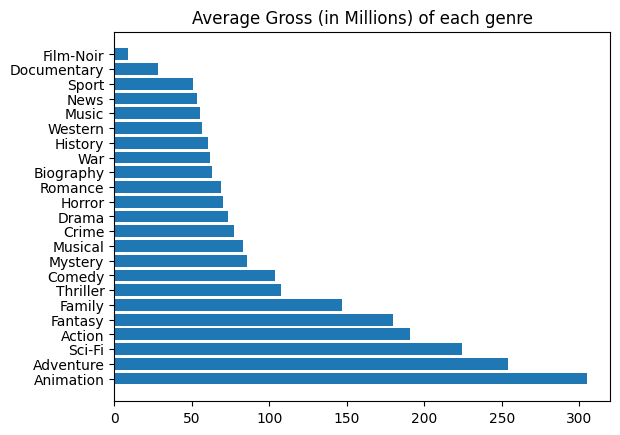

In [125]:
# Plot the Average gross in Bar chart
plt.barh(df3.index, df3['Gross in Millions'])
plt.title("Average Gross (in Millions) of each genre")
plt.show()

The graph shows that **Animation** generated the most worldwide gross, followed by **Adventure** and **Sci-Fi**.

* With the information we have from *#1*, Animation is far from being top genre but still manages to generates the highest average worldwide gross

* Another interesting part is when we merge this finding with information *#2*. **Animation** holds rank 1 in terms of generating worldwide gross, even though top 5 directors NEVER directed any one of them!

# #4 Connection between rating *(in approval_index)*, production budget, and worldwide gross?

In [153]:
# Checking missing data
df4 = film[['approval_Index', 'Production budget $', 'Worldwide gross $']]
df4.head()

,approval_Index,Production budget $,Worldwide gross $
0,7.061101,460000000,2265935552
1,8.489533,400000000,2794731755
2,6.272064,379000000,1045713802
3,7.214013,365000000,1395316979
4,8.460958,300000000,2048359754


<Axes: >

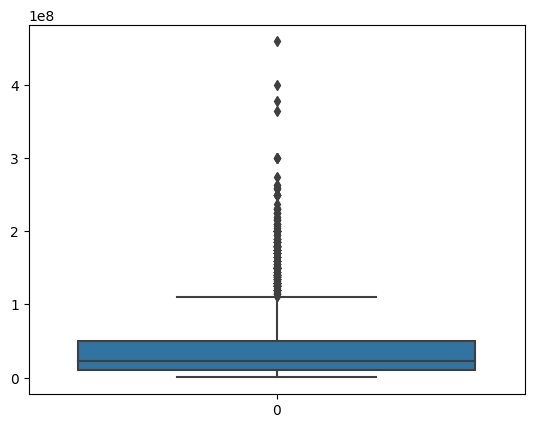

In [147]:
# Checking outliers on Production budget $
sns.boxplot(data=df4['Production budget $'])

As we can see from boxplot above, there are a lot of outliers that can disturb our calculation. So we will **remove any rows** with **production budget > 1.1 x 1e8 ~ 110,000,000**

<Axes: >

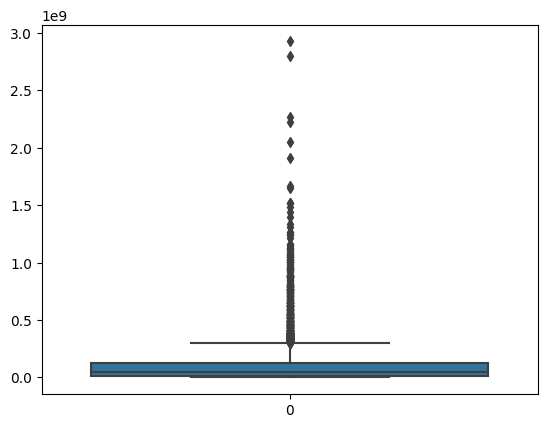

In [148]:
# Checking outliers on Worldwide gross $
sns.boxplot(data=df4['Worldwide gross $'])

As we can see from boxplot above, there are a lot of outliers that can disturb our calculation. So we will **remove any rows** with **Worldwide gross > 0.3 x 1e3 ~ 300,000,000**

In [156]:
# Remove outliers
df4_clean = df4.loc[(df4['Production budget $'] < 110000000) | (df4['Worldwide gross $'] < 300000000)]
df4_clean

,approval_Index,Production budget $,Worldwide gross $
8,5.951728,263700000,282778100
28,5.695804,225000000,260002115
71,5.070176,200000000,218768299
72,5.782218,200000000,210469803
73,4.954749,200000000,219535492
...,...,...,...
4375,6.017902,65000,22233808
4376,4.231464,50000,10426506
4377,2.526405,50000,2335352
4378,4.242085,50000,424149


In [158]:
# Since both Production budget and Worldwide gross are in $, we need to perform standardization.
df4_scaled = df4_clean.copy()

scaler = StandardScaler()
df4_scaled[['Production budget $', 'Worldwide gross $']] = scaler.fit_transform(df4_clean[['Production budget $', 'Worldwide gross $']])
df4_scaled.rename(columns={"Production budget $":"Production Standardized"}, inplace=True)
df4_scaled.rename(columns={"Worldwide gross $":"Gross Standardized"}, inplace=True)
df4_scaled

,approval_Index,Production Standardized,Gross Standardized
8,5.951728,7.515820,1.715101
28,5.695804,6.266283,1.520326
71,5.070176,5.459089,1.167703
72,5.782218,5.459089,1.096736
73,4.954749,5.459089,1.174264
...,...,...,...
4375,6.017902,-0.996369,-0.513016
4376,4.231464,-0.996853,-0.613989
4377,2.526405,-0.996853,-0.683183
4378,4.242085,-0.996853,-0.699527


<Axes: xlabel='Production Standardized', ylabel='approval_Index'>

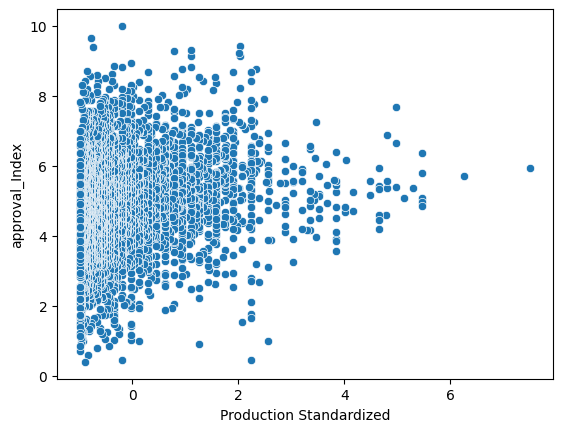

In [164]:
# Checking approval_Index - Production Budget
sns.scatterplot(data=df4_scaled, x='Production Standardized', y='approval_Index')

<Axes: xlabel='Gross Standardized', ylabel='approval_Index'>

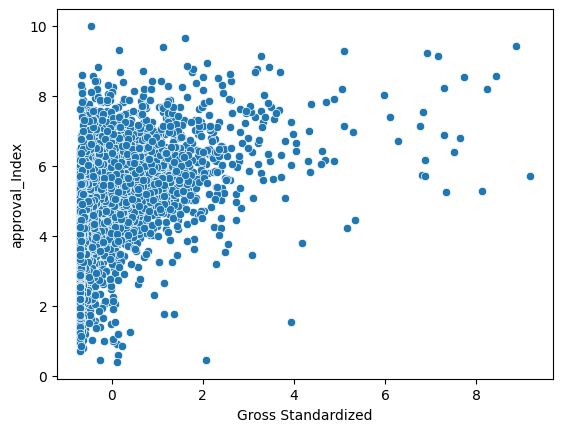

In [160]:
# Checking approval_Index - Worldwide Gross
sns.scatterplot(data=df4_scaled, x='Gross Standardized', y='approval_Index')

<Axes: xlabel='Production Standardized', ylabel='Gross Standardized'>

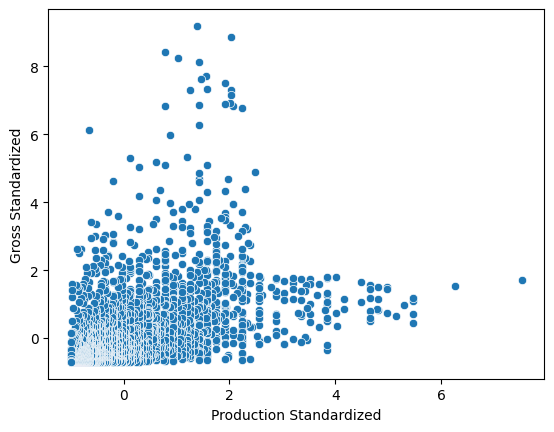

In [165]:
# Checking Production Budget - Worldwide Gross
sns.scatterplot(data=df4_scaled, x='Production Standardized', y='Gross Standardized')

From scatterplots alone, it is still not easy to see the connection since the data mostly stacked on the left side of the graph.


To determine the correlation, we conduct both Pearson correlation and Spearman correlation as below.

In [161]:
# Pearson Correlation
df4_scaled.corr(method='pearson')

,approval_Index,Production Standardized,Gross Standardized
approval_Index,1.000000,0.176119,0.411690
Production Standardized,0.176119,1.000000,0.502664
Gross Standardized,0.411690,0.502664,1.000000


In [162]:
# Spearman Correlation
df4_scaled.corr(method='spearman')

,approval_Index,Production Standardized,Gross Standardized
approval_Index,1.000000,0.197829,0.493480
Production Standardized,0.197829,1.000000,0.646145
Gross Standardized,0.493480,0.646145,1.000000


From two correlation methods, we can say that approval_Index has small correlation (below 0.3) with Production Budget but has medium correlation (between 0.3 and 0.5) with Gross Standardized.

* So, initial production budget slightly affect the rating of the film. The worldwide gross goes in line moderately with rating, the better the movie, the higher the rating and the total viewer.

Meanwhile, the correlation between production budget and worldwide gross is high (above 0.5).

* It can be infered that to produce high quality movie, usually it takes big production budget.

